<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-data" data-toc-modified-id="Import-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></span><ul class="toc-item"><li><span><a href="#For-filtering-dataframes" data-toc-modified-id="For-filtering-dataframes-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>For filtering dataframes</a></span></li><li><span><a href="#For-plotting-all-mCAs-in-a-class-to-find-lower-cell-fraction-limit-of-detection" data-toc-modified-id="For-plotting-all-mCAs-in-a-class-to-find-lower-cell-fraction-limit-of-detection-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>For plotting all mCAs in a class to find lower cell fraction limit of detection</a></span></li><li><span><a href="#Calculating-how-many-datapoints-left-after-trimming" data-toc-modified-id="Calculating-how-many-datapoints-left-after-trimming-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Calculating how many datapoints left after trimming</a></span></li></ul></li><li><span><a href="#Create-dataframes-of-mCAs-seen-in-individuals-as-single-events" data-toc-modified-id="Create-dataframes-of-mCAs-seen-in-individuals-as-single-events-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create dataframes of mCAs seen in individuals as single events</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Plots-histograms-of-all-mCAs-in-each-class,-to-find-lower-limit-of-detection-(Supplementary-Fig.-7a-c)" data-toc-modified-id="Plots-histograms-of-all-mCAs-in-each-class,-to-find-lower-limit-of-detection-(Supplementary-Fig.-7a-c)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plots histograms of all mCAs in each class, to find lower limit of detection (Supplementary Fig. 7a-c)</a></span></li><li><span><a href="#How-many-datapoints-left-after-trimming?" data-toc-modified-id="How-many-datapoints-left-after-trimming?-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>How many datapoints left after trimming?</a></span></li><li><span><a href="#Compare-s-and-mu-inferred-from-trimmed-and-non-trimmed-histograms-(Supplementary-Fig.-7d)" data-toc-modified-id="Compare-s-and-mu-inferred-from-trimmed-and-non-trimmed-histograms-(Supplementary-Fig.-7d)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Compare s and mu inferred from trimmed and non-trimmed histograms (Supplementary Fig. 7d)</a></span></li></ul></div>

- look at cell fraction density histogram for all losses combined - take the cell fraction at which density starts to fall as lower limit of detection for all losses (and do the same for gains and CNLOH)
- then calculate mutation rate and fitness effect with the data trimmed below this mCA-specific lower limit of detection

In [33]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [34]:
# imported packages:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np
import scipy
import scipy.special
import scipy.integrate as it
from scipy.integrate import quad
from scipy import optimize
import math
import time
import zipfile

In [35]:
plt.style.use('cwpython.mplstyle') #use custom style file

In [36]:
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'

In [37]:
neutral_color='#fdbf6f'
gain_color = '#e31a1c'
loss_color = '#a6cee3'

In [38]:
total_people = 482789

# Import data

In [39]:
zf = zipfile.ZipFile('Data_files/Supplementary_data_annotated_cw.csv.zip') 
df = pd.read_csv(zf.open('Supplementary_data_annotated_cw.csv'))
df.head()

,Unnamed: 0,ID,SEX,AGE,PREV_CANCER,CHR,START_MB,END_MB,SIZE_MB,BAF (SE),...,END_MB_RANGE,affects,proportion_of_chrom_or_arm,annotation,bands_involved,genes_involved,number_genes_involved,total_mCAs,persons_total_mCAs,persons_total_known_mCAs
0,0,1,M,60-65,1,1,0.91,249.21,248.30,0.0042 (0.0006),...,249.2-249.2,whole-chromosome,0.996,1?,"['1p36.33', '1p36.32', '1p36.31', '1p36.23', '...","['SGIP1', 'SLC45A1', 'NECAP2', 'CLIC4', 'AZIN2...",2608,4,"['12q?', '1?', '7?', '8+']",['8+']
1,1,2,M,55-60,0,1,0.84,249.16,248.32,0.0042 (0.0006),...,249.1-249.2,whole-chromosome,0.996,1=,"['1p36.33', '1p36.32', '1p36.31', '1p36.23', '...","['SGIP1', 'SLC45A1', 'NECAP2', 'CLIC4', 'AZIN2...",2611,1,['1='],['1=']
2,2,3,F,45-50,1,1,0.84,249.20,248.36,0.0034 (0.0005),...,249.2-249.2,whole-chromosome,0.996,1?,"['1p36.33', '1p36.32', '1p36.31', '1p36.23', '...","['SGIP1', 'SLC45A1', 'NECAP2', 'CLIC4', 'AZIN2...",2611,1,['1?'],[]
3,3,4,M,60-65,0,1,0.75,249.22,248.47,0.0041 (0.0006),...,249.2-249.2,whole-chromosome,0.997,1?,"['1p36.33', '1p36.32', '1p36.31', '1p36.23', '...","['SGIP1', 'SLC45A1', 'NECAP2', 'CLIC4', 'AZIN2...",2616,1,['1?'],[]
4,4,5,F,55-60,0,1,0.75,249.21,248.46,0.0056 (0.0005),...,249.2-249.2,whole-chromosome,0.997,1=,"['1p36.33', '1p36.32', '1p36.31', '1p36.23', '...","['SGIP1', 'SLC45A1', 'NECAP2', 'CLIC4', 'AZIN2...",2616,2,"['12q=', '1=']","['12q=', '1=']"


#  Functions

## For filtering dataframes

In [40]:
def filter_by_mCA_type(mCA_type, dataframe): #filter to e.g. only include those that have gains
    mask = [(mCA_type in x) for x in dataframe['COPY_CHANGE']]
    return dataframe[mask].copy()

In [41]:
def filter_by_number_mCAs(number_mCAs, dataframe): #e.g. filter by those that e.g. only have 1 total mCA
    mask = dataframe['total_mCAs']==number_mCAs
    return dataframe[mask].copy()

In [42]:
def filter_by_annotation(annotation, dataframe): #e.g. 3+
    mask = dataframe['annotation'] == annotation
    return dataframe[mask].copy()

## For plotting all mCAs in a class to find lower cell fraction limit of detection

In [43]:
def log_CFs_class(df):
    df_copy = df.copy(deep = True)
    CFs_mCA_class = df_copy['CELL_FRAC'].to_list()
    CFs = []
    for i in CFs_mCA_class:
        CFs.append(np.log(float(i)))
    print('total mCAs = '+str(len(CFs)))
    return CFs

In [44]:
def error_bars(hist, normed_value, widths):
    
    errors={}
    n=0
    for i in list(hist):
        normalised_hist = i/(normed_value*widths)
        log_hist = np.log(normalised_hist)
        sqrt_hist = math.sqrt(i)
        if sqrt_hist == 1:
            upper_error = 1
            lower_error = 0.9
        if sqrt_hist !=1:
            upper_error = sqrt_hist
            lower_error = sqrt_hist
        normalised_upper_error = upper_error/(normed_value*widths)
        normalised_lower_error = lower_error/(normed_value*widths)
        errors[n]=(normalised_hist[0], normalised_upper_error[0], normalised_lower_error[0])
        n = n+1

    errors_corrected ={}
    for k, v in errors.items():
        binheight = v[0]
        log_binheight = np.log(v[0])
        upper_error = v[1]
        lower_error = v[2]
        log_upper_error = (np.log(upper_error+binheight))-log_binheight
        log_lower_error = log_binheight-(np.log(binheight-lower_error))
        errors_corrected[k] = (log_binheight, log_upper_error, log_lower_error)

    lower_err=[]
    upper_err=[]
    for k, v in errors_corrected.items():
        lower_error = v[2]
        upper_error = v[1]
        lower_err.append(lower_error)
        upper_err.append(upper_error)

    err = [tuple(lower_err),tuple(upper_err)]
    
    return err

In [45]:
def plot_cell_fraction_distribution_with_trimming_point(mCA_type, labelname, log_VAFs, total_people, points_to_trim):

    ###################################################
    fig, ax1 = plt.subplots(figsize=(6.5, 5), nrows=1, ncols=1)
    fig.subplots_adjust(hspace=0.3, wspace = 0.3)
    
    label = labelname

    ## Plot the data ###    
    m_width = 1.5
    c_size = 3
    c_thick = 1.5
    e_width = 1.5
    alpha = 1
    
    if mCA_type == '+':
        color = gain_color
    if mCA_type == '-':
        color = loss_color
    if mCA_type == '=':
        color = neutral_color
    
    mu = 1
    bin_size = 'doane'

    normed_value = total_people*mu #study_total*mu
    hist, bins = np.histogram(log_VAFs, bins=bin_size, range=(min(log_VAFs),max(log_VAFs)))

    cell_fraction_bins = []
    for i in bins:
        cell_fraction_bins.append(np.exp(i)*100)

    #plot the line where want to trim
    ax1.plot([bins[points_to_trim], bins[points_to_trim]], [-12, -4], color = color, lw = 2, linestyle = ':')
    
    trimming_VAF = np.exp(bins[points_to_trim])
    
    ax1.annotate(str(round(trimming_VAF*100, 2))+'%', xy = (bins[points_to_trim], -11),
                va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"), fontsize = 12)
    
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
    hist = np.array(hist, dtype=float)
    normalised_hist = hist/(normed_value*widths)
    log_hist_for_plot = np.log(normalised_hist)

    errors = error_bars(hist, normed_value, widths)

    ax1.errorbar(bin_centres, log_hist_for_plot, yerr= errors, fmt = 'o', ecolor = color, \
     elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = 8, markeredgewidth = 0.5, \
     markeredgecolor = 'k', markerfacecolor = color, zorder=0, alpha = alpha)

    x_major_ticks = [np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9), np.log(1.0)]
    x_major_tick_labels = ["0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50","","","","","100"]

    ax1.set_xlabel('fraction of cells (%)')
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels)
    ax1.set_yticks([])
    ax1.set_yticklabels([])
    ax1.tick_params(axis = 'both', which = 'major', color = grey4)
    ax1.tick_params(axis = 'both', which='minor', bottom=False)
    ax1.set_ylim(-12, -4)
    ax1.set_xlim(np.log(0.001), 0)
    ax1.set_title(labelname)

    ax1.set_ylabel('relative density of mCAs')
    
    plt.tight_layout(w_pad = 5)

    savename = labelname.replace(' ', '_')
    
#     plt.savefig('Figures/'+str(savename)+'_cell_fraction_density_histogram_trimming.pdf')

    plt.show()
    
    return trimming_VAF

In [46]:
def log_CFs_plot_all_mCAs(df, mCA_class, labelname, total_people, points_to_trim):
    logCFs = log_CFs_class(df)
    print('plotting the histograms...')
    print('')
    trimming_VAF = plot_cell_fraction_distribution_with_trimming_point(mCA_class, labelname, logCFs, total_people, points_to_trim)
    return trimming_VAF

## Calculating how many datapoints left after trimming

In [47]:
def log_CFs_with_trimming(df, mCA, trimming_VAF):
    df_copy = df.copy(deep = True)
    CFs_mCA = df_copy[df_copy['annotation']== mCA]['CELL_FRAC'].to_list()
    CFs = []
    for i in CFs_mCA:
        if float(i) >=float(trimming_VAF):
            CFs.append(np.log(float(i)))
    print('total '+mCA+' mCAs = '+str(len(CFs)))
    return CFs

In [48]:
def length_log_CFs_with_trimming(df, mCA, trimming_cell_fraction):
    logCFs = log_CFs_with_trimming(df, mCA, trimming_cell_fraction)
    return len(logCFs)  

# Create dataframes of mCAs seen in individuals as single events

In [49]:
gain_df = filter_by_mCA_type('gain', df) #filter the dataframe to just include gains
single_gain_df = filter_by_number_mCAs(1, gain_df) #filter the dataframe to only include people that have total 1 mCA

In [50]:
loss_df = filter_by_mCA_type('loss', df) #filter the dataframe to just include losss
single_loss_df = filter_by_number_mCAs(1, loss_df) #filter the dataframe to only include people that have total 1 mCA

In [51]:
CNLOH_df = filter_by_mCA_type('neutral', df) #filter the dataframe to just include CNLOHs
single_CNLOH_df = filter_by_number_mCAs(1, CNLOH_df) #filter the dataframe to only include people that have total 1 mCA

# Functions

In [52]:
def proportion(chromosome, start, end, size):
    chromosome_size = chromosome_sizes[str(chromosome)]/1e6
    q_arm_start = chromosome_arm_sizes[str(chromosome)+'p']/1e6
    p_arm_size = chromosome_arm_sizes[str(chromosome)+'p']/1e6
    q_arm_size = chromosome_arm_sizes[str(chromosome)+'q']/1e6
        
    proportion = ''
    
    if start < q_arm_start:
        if end <= q_arm_start:
            effects = 'p-arm'
            proportion = size/p_arm_size
        if end > q_arm_start:
            effects = 'whole-chromosome'
            proportion = size/chromosome_size
    if start >= q_arm_start:
        effects = 'q-arm'
        proportion = size/q_arm_size
    
    return round(proportion, 3) #function to calculate what proportion of the p arm, q arm or whole chromosome the mCA affects

In [53]:
def affects(chromosome, start, end, size):
    chromosome_size = chromosome_sizes[str(chromosome)]/1e6
    q_arm_start = chromosome_arm_sizes[str(chromosome)+'p']/1e6
    p_arm_size = chromosome_arm_sizes[str(chromosome)+'p']/1e6
    q_arm_size = chromosome_arm_sizes[str(chromosome)+'q']/1e6
    
    effects = ''
    
    if start < q_arm_start:
        if end <= q_arm_start:
            affects = 'p-arm'
            proportion = size/p_arm_size
        if end > q_arm_start:
            affects = 'whole-chromosome'
            proportion = size/chromosome_size
    if start >= q_arm_start:
        affects = 'q-arm'
        proportion = size/q_arm_size
    
    return affects #function to calculate if the mCA affects just the p arm, just the q arm or both ('whole chromosome')

In [54]:
def log_VAFs(df, mCA):
    df_copy = df.copy(deep = True)
    VAFs_mCA = df_copy[df_copy['annotation']== mCA]['CELL_FRAC'].to_list()
    VAFs = []
    for i in VAFs_mCA:
        VAFs.append(np.log(float(i)))
    print('total '+mCA+' mCAs = '+str(len(VAFs)))
    return VAFs

In [55]:
def log_VAFs_MLE_and_plot_single_mCA(df, mCA, labelname, total_people):
    print(mCA)
    logVAFs = log_VAFs(df, mCA)
    print('calculating s and mu...')
    start_time = time.time()
    s, mu = cumulative_MLE_s_mu(mCA, logVAFs, total_people)
    print('MLE for '+str(mCA)+' completed in %s minutes' % round((time.time() - start_time)/60, 3))
    print('s = ', s)
    print('mu = ', mu)
    print('plotting the histograms...')
    plots_with_cumulative_MLE(mCA, labelname, s, mu, logVAFs, total_people)
    print('')
    return s, mu    

# Plots histograms of all mCAs in each class, to find lower limit of detection (Supplementary Fig. 7a-c)

total mCAs = 1410
plotting the histograms...



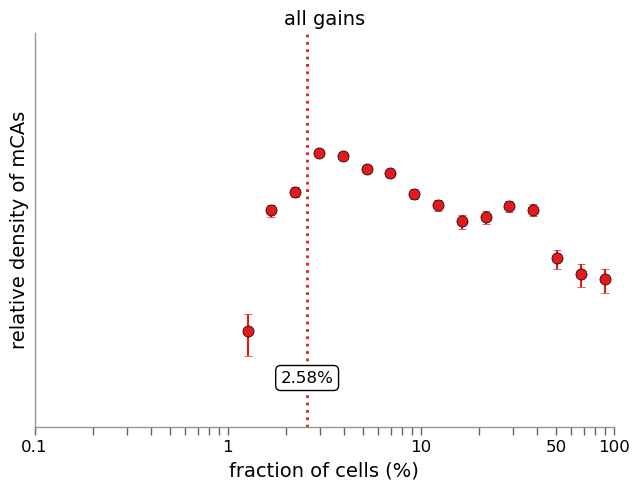

lower cell fraction limit of detection for gains = 2.58%


In [56]:
gain_trimming_cell_fraction = log_CFs_plot_all_mCAs(single_gain_df, '+', 'all gains', total_people, 3) 
#3 = number of lower histogram bins to trim off, because that is where density starts to decline
print('lower cell fraction limit of detection for gains = '+str(round(gain_trimming_cell_fraction*100, 2))+'%')

total mCAs = 2248
plotting the histograms...



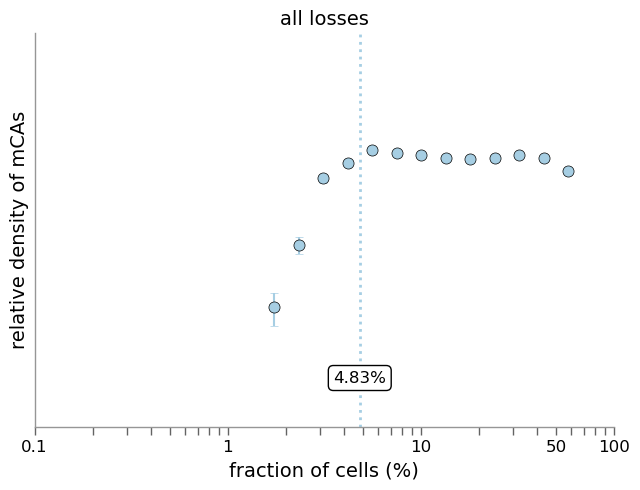

lower cell fraction limit of detection for losses = 4.83%


In [57]:
loss_trimming_cell_fraction = log_CFs_plot_all_mCAs(single_loss_df, '-', 'all losses', total_people, 4)
#4 = number of lower histogram bins to trim off, because that is where density starts to decline
print('lower cell fraction limit of detection for losses = '+str(round(loss_trimming_cell_fraction*100, 2))+'%')

total mCAs = 7433
plotting the histograms...



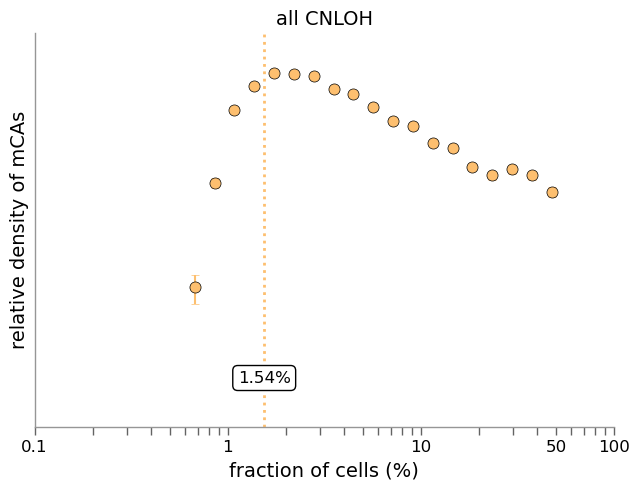

lower cell fraction limit of detection for CN-LOH = 1.54%


In [58]:
CNLOH_trimming_cell_fraction = log_CFs_plot_all_mCAs(single_CNLOH_df, '=', 'all CNLOH', total_people, 4)
#4 = number of lower histogram bins to trim off, because that is where density starts to decline
print('lower cell fraction limit of detection for CN-LOH = '+str(round(CNLOH_trimming_cell_fraction*100, 2))+'%')

# How many datapoints left after trimming?

In [59]:
#create a dictionary that contains, for each possible all_gains, the gain as the key and the dataframe as the value
#for just those individuals with 1 mCA total
all_gains_dataframes = {}
all_gains_df = pd.DataFrame(columns=['gain', 'number_people'])
for i in range(1, 23):
    for change in ['+', 'p+', 'q+']:
        gain_mCA = str(i)+change
        tri_dataframe = filter_by_annotation(gain_mCA, single_gain_df)
        all_gains_dataframes[gain_mCA] = tri_dataframe
        df_to_add = pd.DataFrame([[gain_mCA, len(tri_dataframe)]], columns=['gain', 'number_people'])
        all_gains_df = all_gains_df.append(df_to_add)

all_gains_df_sorted = all_gains_df.sort_values('number_people', ascending = False)
all_gains_df_sorted_non_zero = all_gains_df_sorted[all_gains_df_sorted['number_people']!=0].copy()

gains_8_or_more = all_gains_df_sorted_non_zero[all_gains_df_sorted_non_zero['number_people'] >=8].copy(deep=True)['gain'].to_list()

In [60]:
#create a dictionary that contains, for each possible all_losses, the loss as the key and the dataframe as the value
#for just those individuals with 1 mCA total
all_losses_dataframes = {}
all_losses_df = pd.DataFrame(columns=['loss', 'number_people'])
for i in range(1, 23):
    for change in ['-', 'p-', 'q-']:
        loss_mCA = str(i)+change
        loss_dataframe = filter_by_annotation(loss_mCA, single_loss_df)
        all_losses_dataframes[loss_mCA] = loss_dataframe
        df_to_add = pd.DataFrame([[loss_mCA, len(loss_dataframe)]], columns=['loss', 'number_people'])
        all_losses_df = all_losses_df.append(df_to_add)

all_losses_df_sorted = all_losses_df.sort_values('number_people', ascending = False)
all_losses_df_sorted_non_zero = all_losses_df_sorted[all_losses_df_sorted['number_people']!=0].copy()

losses_8_or_more = all_losses_df_sorted_non_zero[all_losses_df_sorted_non_zero['number_people'] >=8].copy(deep=True)['loss'].to_list()

In [61]:
#create a dictionary that contains, for each possible all_CNLOH, the CNLOH as the key and the dataframe as the value
#for just those individuals with 1 mCA total
all_CNLOH_dataframes = {}
all_CNLOH_df = pd.DataFrame(columns=['neutral', 'number_people'])
for i in range(1, 23):
    for change in ['=', 'p=', 'q=']:
        CNLOH_mCA = str(i)+change
        CNLOH_dataframe = filter_by_annotation(CNLOH_mCA, single_CNLOH_df)
        all_CNLOH_dataframes[CNLOH_mCA] = CNLOH_dataframe
        df_to_add = pd.DataFrame([[CNLOH_mCA, len(CNLOH_dataframe)]], columns=['CNLOH', 'number_people'])
        all_CNLOH_df = all_CNLOH_df.append(df_to_add)

all_CNLOH_df_sorted = all_CNLOH_df.sort_values('number_people', ascending = False)
all_CNLOH_df_sorted_non_zero = all_CNLOH_df_sorted[all_CNLOH_df_sorted['number_people']!=0].copy()

CNLOH_8_or_more = all_CNLOH_df_sorted_non_zero[all_CNLOH_df_sorted_non_zero['number_people'] >=8].copy(deep=True)['CNLOH'].to_list()

In [62]:
length_log_CFs = {}
for gain in gains_8_or_more: #gains_8_or_more
    length_log_CFs[gain] = length_log_CFs_with_trimming(single_gain_df, gain, gain_trimming_cell_fraction)
for loss in losses_8_or_more: #gains_8_or_more
    length_log_CFs[loss] = length_log_CFs_with_trimming(single_loss_df, loss, loss_trimming_cell_fraction)
for CNLOH in CNLOH_8_or_more: #gains_8_or_more
    length_log_CFs[CNLOH] = length_log_CFs_with_trimming(single_CNLOH_df, CNLOH, CNLOH_trimming_cell_fraction)

total 12+ mCAs = 212
total 15q+ mCAs = 172
total 22q+ mCAs = 152
total 14q+ mCAs = 130
total 21q+ mCAs = 119
total 8+ mCAs = 61
total 18+ mCAs = 36
total 9+ mCAs = 38
total 5p+ mCAs = 32
total 3+ mCAs = 21
total 1p+ mCAs = 23
total 5+ mCAs = 20
total 9q+ mCAs = 16
total 3q+ mCAs = 15
total 12q+ mCAs = 15
total 1q+ mCAs = 14
total 6p+ mCAs = 13
total 18q+ mCAs = 10
total 5q+ mCAs = 8
total 17q+ mCAs = 9
total 6q+ mCAs = 8
total 2p+ mCAs = 8
total 9p+ mCAs = 8
total 3p+ mCAs = 8
total 20q- mCAs = 350
total 13q- mCAs = 292
total 10q- mCAs = 129
total 11q- mCAs = 116
total 5q- mCAs = 99
total 2p- mCAs = 105
total 16p- mCAs = 104
total 4q- mCAs = 84
total 14q- mCAs = 58
total 7q- mCAs = 53
total 22q- mCAs = 54
total 17q- mCAs = 44
total 2q- mCAs = 33
total 6q- mCAs = 25
total 11p- mCAs = 28
total 16q- mCAs = 25
total 9q- mCAs = 25
total 3p- mCAs = 24
total 12q- mCAs = 23
total 7p- mCAs = 20
total 21q- mCAs = 10
total 8p- mCAs = 15
total 1q- mCAs = 19
total 6p- mCAs = 16
total 12p- mCAs = 16

# Compare s and mu inferred from trimmed and non-trimmed histograms (Supplementary Fig. 7d)

In [63]:
# Import the fitness and mutation rate inferences from trimmed histograms (s and mu inferred from mCA_mu_and_s_MLE_using_heatmaps_with_lower_trimming.py)
df_trimmed = pd.read_csv('Data_files/mCA_s_mu_with_confidence_intervals_individual_mCAs_with_lower_cell_fraction_trimming.txt', sep = '\t')
df_trimmed = df_trimmed.rename(columns = {'Unnamed: 0': 'mCA', 's': 's_trimmed', 'mu': 'mu_trimmed'})
df_trimmed = df_trimmed.set_index('mCA')

In [64]:
# Import the fitness and mutation rate inferences (from the UNtrimmed cell fractions)
df_original = pd.read_csv('Data_files/mCA_s_mu_with_confidence_intervals_individual_mCAs.txt', sep = '\t')
df_untrimmed = df_original[['mCA', 's', 'mu']].copy()
df_untrimmed = df_untrimmed.set_index('mCA')

In [65]:
# Merge the 2 dataframes and create a dictionary, where key = mCA and value = a dictionary of 's', 'mu', 's_trimmed' and 'mu_trimmed'
df_merged = pd.merge(df_untrimmed, df_trimmed, left_index=True, right_index=True)
df_merged_dict = df_merged.to_dict(orient = 'index')

In [66]:
#lists of mCAs where the difference between trimmed and untrimmed is >x%
s_different = []
mu_different = []

for k, v in df_merged_dict.items():
    s = v['s']
    mu = v['mu']
    s_trimmed = v['s_trimmed']
    mu_trimmed = v['mu_trimmed']
    if s/s_trimmed >1.2:
        s_different.append(k)
    if s_trimmed/s >1.2:
        s_different.append(k)
    if mu/mu_trimmed >1.5:
        mu_different.append(k)
    if mu_trimmed/mu >1.5:
        mu_different.append(k)
        
print('mCAs where the s is >20% different between the trimmed and untrimmed MLE = ', s_different)
print('')
print('mCAs where the mu is >50% different between the trimmed and untrimmed MLE = ', mu_different)

mCAs where the s is >20% different between the trimmed and untrimmed MLE =  []

mCAs where the mu is >50% different between the trimmed and untrimmed MLE =  ['10q-', '12=', '14q-', '15q-', '18p-', '20-', '21q-']


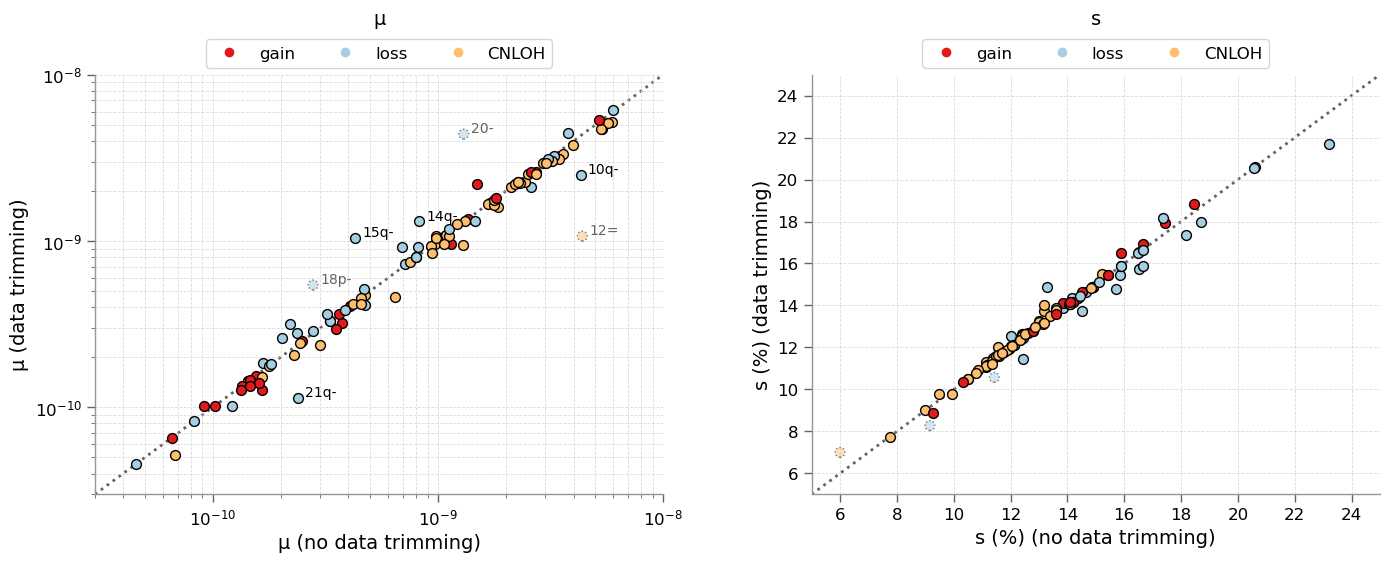

In [72]:
# Plot the correlation between inferred fitness and mutation rate using trimmed vs. untrimmed cell fractions
fig, axes = plt.subplots(figsize=(14, 5.75), nrows=1, ncols=2)
fig.subplots_adjust(hspace=0.3, wspace = 0.3)
    
ax1 = axes[0]
ax2 = axes[1]

## Plot the data ###    
m_width = 1.5
c_size = 3
c_thick = 1.5
e_width = 1.5
    
mCA_colors = {'+': gain_color, '-': loss_color, '=':  neutral_color}

for k, v in df_merged_dict.items():
    total_mCA_trimmed = length_log_CFs[k]
    if total_mCA_trimmed >=8:
        s = float(v['s'])*100
        if s>28:
            s = 29.75
        s_trimmed = float(v['s_trimmed'])*100
        if s_trimmed>28:
            s_trimmed = 29.75
        ax1.scatter(float(v['mu']), float(v['mu_trimmed']), color = mCA_colors[k[-1]], s = 50, lw = 1, edgecolor = 'k', zorder = 2, alpha = 1)
        ax2.scatter(s, s_trimmed, color = mCA_colors[k[-1]], s = 50, lw = 1, edgecolor = 'k', zorder = 2, alpha = 1)
        if k in mu_different:
            ax1.annotate(k, xy = (float(v['mu']), float(v['mu_trimmed'])),
                    xytext=(5, 4), textcoords="offset points", va="center", ha="left", fontsize = 10)
        if k in s_different:
            ax2.annotate(k, xy = (float(v['s'])*100, float(v['s_trimmed'])*100),
                    xytext=(5, 4), textcoords="offset points", va="center", ha="left", fontsize = 10)
        
    if total_mCA_trimmed <8:
        s = float(v['s'])*100
        if s>28:
            s = 29.75
        s_trimmed = float(v['s_trimmed'])*100
        if s_trimmed>28:
            s_trimmed = 29.75
        ax1.scatter(float(v['mu']), float(v['mu_trimmed']), color = mCA_colors[k[-1]], s = 50, lw = 1, linestyle = ':', edgecolor = 'k', zorder = 2, alpha = 0.5)
        ax2.scatter(s, s_trimmed, color = mCA_colors[k[-1]], s = 50, lw = 1, linestyle = ':', edgecolor = 'k', zorder = 2, alpha = 0.5)
        if k in mu_different:
            ax1.annotate(k, xy = (float(v['mu']), float(v['mu_trimmed'])),
                    xytext=(5, 4), textcoords="offset points", va="center", ha="left", fontsize = 10, color = grey4)
        if k in s_different:
            ax2.annotate(k, xy = (float(v['s'])*100, float(v['s_trimmed'])*100),
                    xytext=(5, 4), textcoords="offset points", va="center", ha="left", fontsize = 10, color = grey4)

    
ax1.plot([3e-11, 1e-8], [3e-11, 1e-8], color = grey4, lw = 2, linestyle = ':', zorder = 0)
ax2.plot([5, 31], [5, 31], color = grey4, lw = 2, linestyle = ':', zorder = 0)

ax1.tick_params(axis = 'both', which = 'major', color = grey4)
ax1.tick_params(axis = 'both', which='minor', color = grey4)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(3e-11, 1e-8)
ax1.set_ylim(3e-11, 1e-8)
ax1.set_title('\u03BC', y = 1.1)
ax1.set_xlabel('\u03BC (no data trimming)')
ax1.set_ylabel('\u03BC (data trimming)')

ax2.set_title('s', y = 1.1)
ax2.set_xlim(5, 25)
ax2.set_ylim(5, 25)
x_major_ticks = [6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
x_major_tick_labels = ["6", "8", "10", "12", "14", "16", "18", "20", "22", "24"]
ax2.set_xticks(x_major_ticks)
ax2.set_xticklabels(x_major_tick_labels)
ax2.set_yticks(x_major_ticks)
ax2.set_yticklabels(x_major_tick_labels)
ax2.tick_params(axis = 'both', which = 'major', color = grey4)
ax2.tick_params(axis = 'both', which='minor', bottom=False)
ax2.set_xlabel('s (%) (no data trimming)')
ax2.set_ylabel('s (%) (data trimming)')

ax1.grid(which="both", color = grey2)
ax2.grid(which="major", color = grey2)

custom_lines = [Line2D([0], [0], color=gain_color, lw=0, marker = 'o'),
                Line2D([0], [0], color=loss_color, lw=0, marker = 'o'),
                Line2D([0], [0], color=neutral_color, lw=0, marker = 'o')]

ax1.legend(custom_lines, ['gain', 'loss', 'CNLOH'], ncol = 3, bbox_to_anchor=(0.5, 1.05), loc = 'center', frameon = 'yes', fancybox = 'yes')
ax2.legend(custom_lines, ['gain', 'loss', 'CNLOH'], ncol = 3, bbox_to_anchor=(0.5, 1.05), loc = 'center', frameon = 'yes', fancybox = 'yes')

plt.tight_layout(w_pad = 5)

plt.savefig('Figures/mu_vs_mutrimmed_and_s_vs_strimmed.pdf')

plt.show()